In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df = pd.read_csv(r"/content/relince dataset 2015 - 2022.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,405.186554,407.792389,403.975037,405.917999,382.812164,1481821.0
1,2015-01-02,406.009430,409.643921,404.272217,404.843658,381.798981,3665683.0
2,2015-01-05,404.592224,407.289520,399.609100,400.409149,377.616882,5051970.0
3,2015-01-06,397.734741,399.106232,380.362396,382.236786,360.478943,9313990.0
4,2015-01-07,382.693970,392.614471,382.648254,390.557220,368.325775,10360156.0


In [ ]:
# Convert index to datetime if it's not already
df.index = pd.to_datetime(df.index)

# **Feature engineering**

In [ ]:
# Feature Engineering

# Extracting Date Features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['WeekOfYear'] = df.index.isocalendar().week

# Rolling Statistics
df['RollingMean_5'] = df['Adj Close'].rolling(window=5).mean()
df['RollingMean_10'] = df['Adj Close'].rolling(window=10).mean()
df['RollingStd_5'] = df['Adj Close'].rolling(window=5).std()

# Lag Features
df['Lag_1'] = df['Adj Close'].shift(1)
df['Lag_2'] = df['Adj Close'].shift(2)
df['Lag_3'] = df['Adj Close'].shift(3)


In [ ]:
# Data Preprocessing
close_df = pd.DataFrame(df['Close']).reset_index()

# ***EDA***

First few rows of the dataset:
                                     Date        Open        High         Low  \
1970-01-01 00:00:00.000000000  2015-01-01  405.186554  407.792389  403.975037   
1970-01-01 00:00:00.000000001  2015-01-02  406.009430  409.643921  404.272217   
1970-01-01 00:00:00.000000002  2015-01-05  404.592224  407.289520  399.609100   
1970-01-01 00:00:00.000000003  2015-01-06  397.734741  399.106232  380.362396   
1970-01-01 00:00:00.000000004  2015-01-07  382.693970  392.614471  382.648254   

                                    Close   Adj Close      Volume  Year  \
1970-01-01 00:00:00.000000000  405.917999  382.812164   1481821.0  1970   
1970-01-01 00:00:00.000000001  404.843658  381.798981   3665683.0  1970   
1970-01-01 00:00:00.000000002  400.409149  377.616882   5051970.0  1970   
1970-01-01 00:00:00.000000003  382.236786  360.478943   9313990.0  1970   
1970-01-01 00:00:00.000000004  390.557220  368.325775  10360156.0  1970   

                               

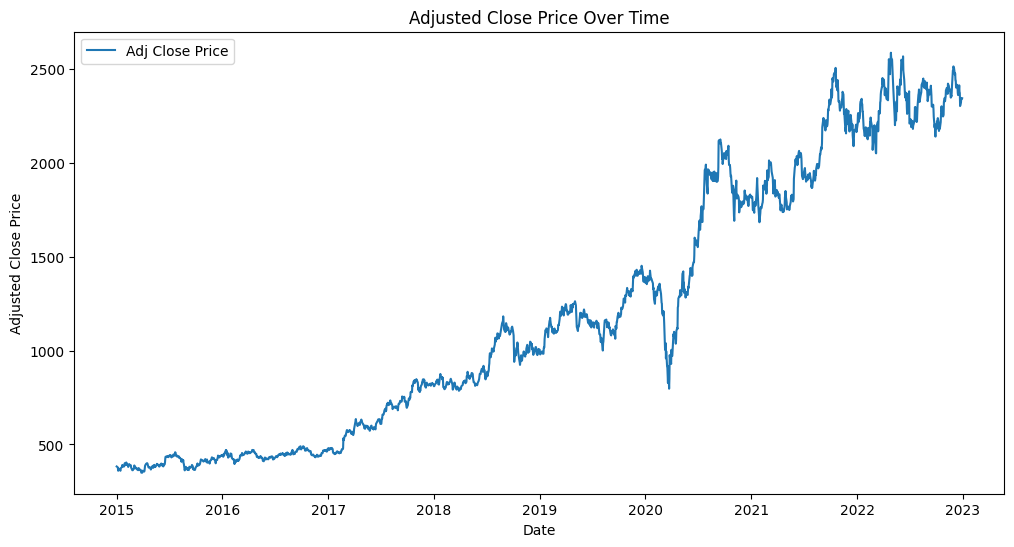

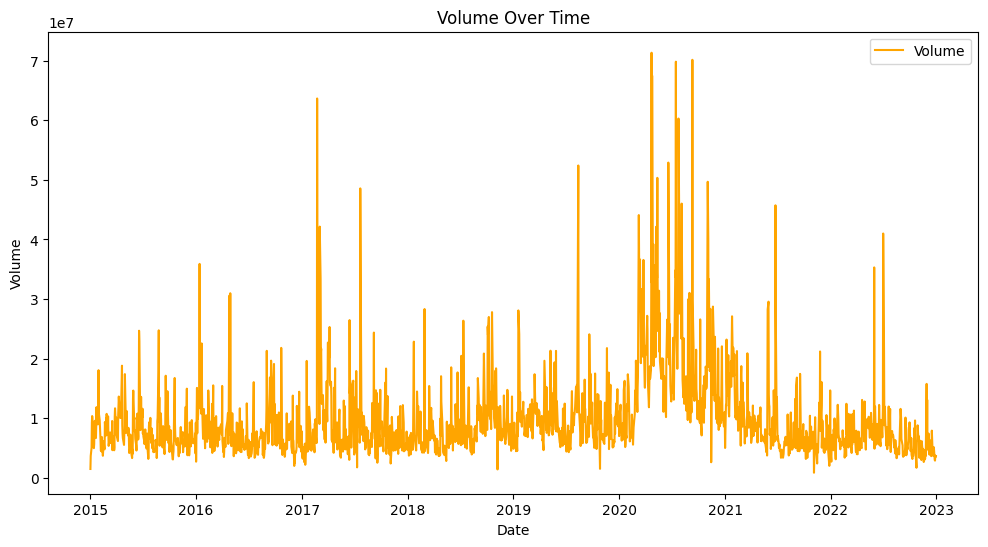


Correlation Matrix:
                    Open      High       Low     Close  Adj Close    Volume  \
Open            1.000000  0.999741  0.999739  0.999460   0.999451  0.072396   
High            0.999741  1.000000  0.999680  0.999799   0.999786  0.081515   
Low             0.999739  0.999680  1.000000  0.999773   0.999766  0.065801   
Close           0.999460  0.999799  0.999773  1.000000   0.999989  0.074473   
Adj Close       0.999451  0.999786  0.999766  0.999989   1.000000  0.073748   
Volume          0.072396  0.081515  0.065801  0.074473   0.073748  1.000000   
Year                 NaN       NaN       NaN       NaN        NaN       NaN   
Month                NaN       NaN       NaN       NaN        NaN       NaN   
Day                  NaN       NaN       NaN       NaN        NaN       NaN   
DayOfWeek            NaN       NaN       NaN       NaN        NaN       NaN   
WeekOfYear           NaN       NaN       NaN       NaN        NaN       NaN   
RollingMean_5   0.999459  0.999

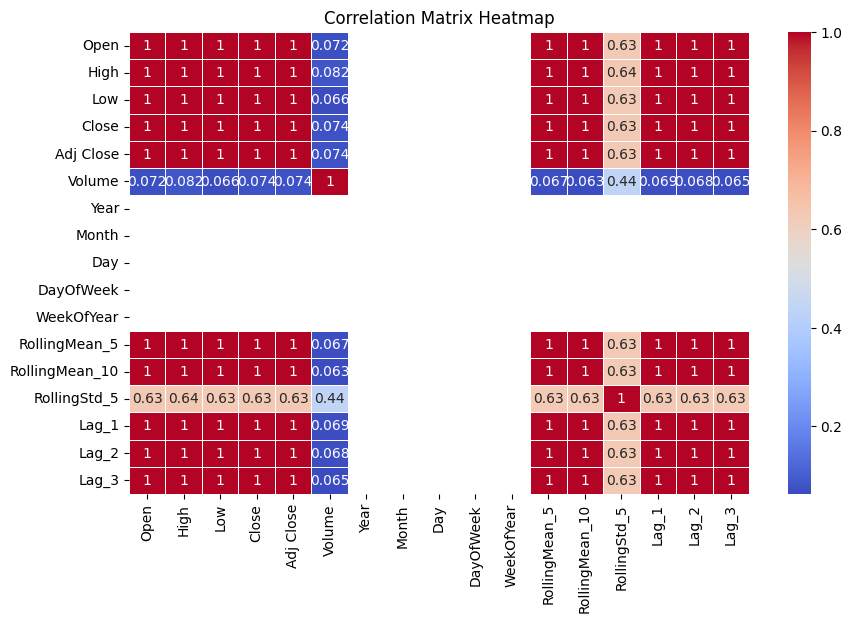

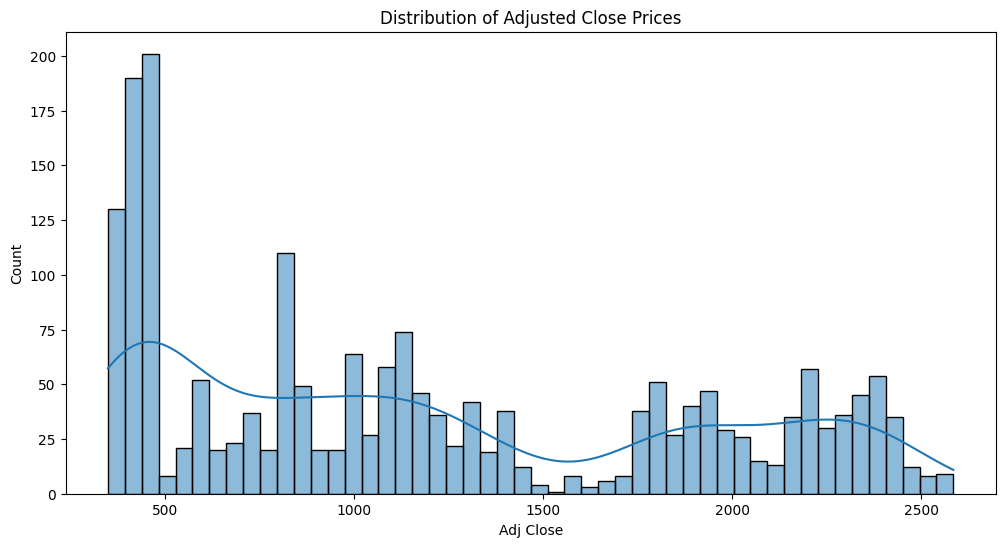

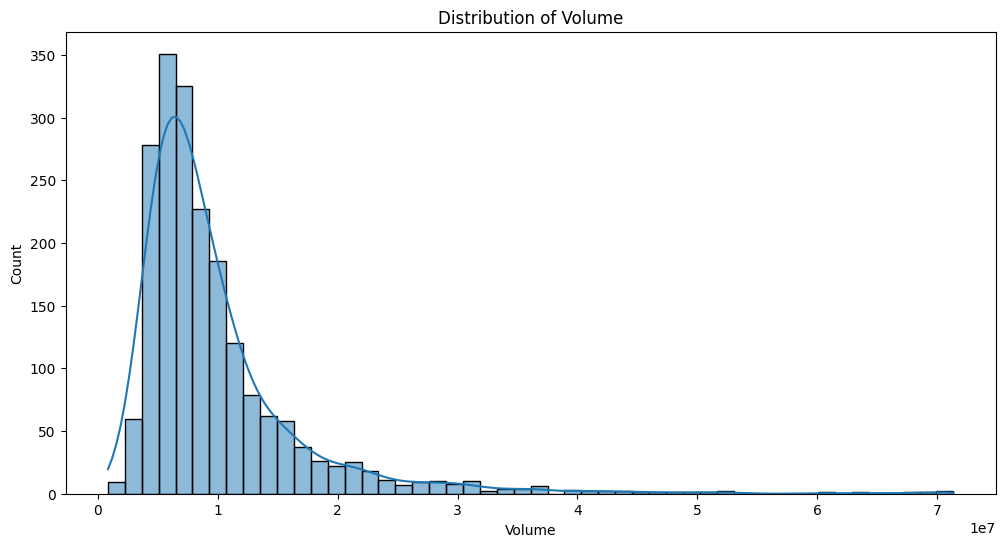

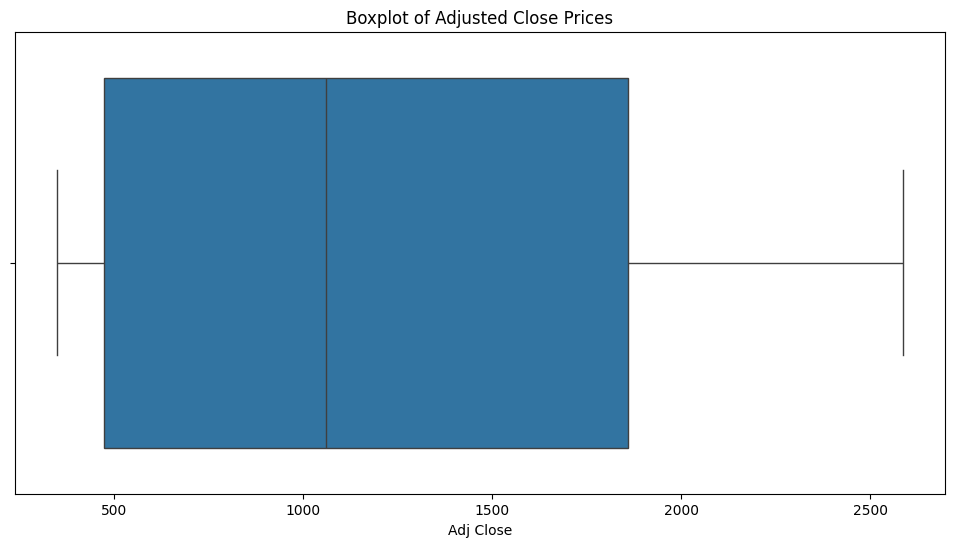

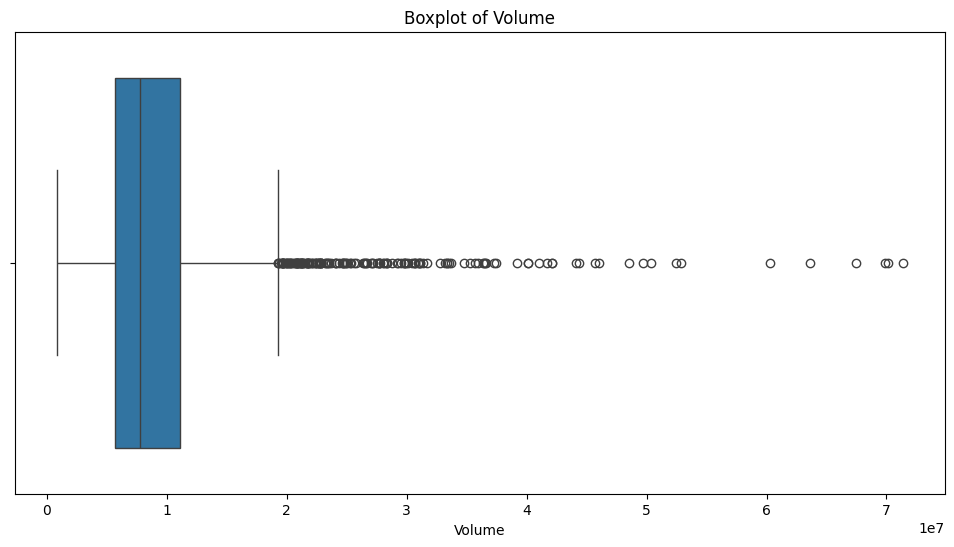

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nBasic Information about the dataset:")
print(df.info())

# Summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data types of the columns
print("\nData Types:")
print(df.dtypes)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plotting the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price Over Time')
plt.legend()
plt.show()

# Volume over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.legend()
plt.show()

# Correlation matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Distribution plots
plt.figure(figsize=(12, 6))
sns.histplot(df['Adj Close'], kde=True, bins=50)
plt.title('Distribution of Adjusted Close Prices')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Volume'], kde=True, bins=50)
plt.title('Distribution of Volume')
plt.show()

# Boxplot to check for outliers in 'Adj Close' and 'Volume'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Adj Close'])
plt.title('Boxplot of Adjusted Close Prices')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Volume'])
plt.title('Boxplot of Volume')
plt.show()

Text(0.5, 1.0, 'Low')

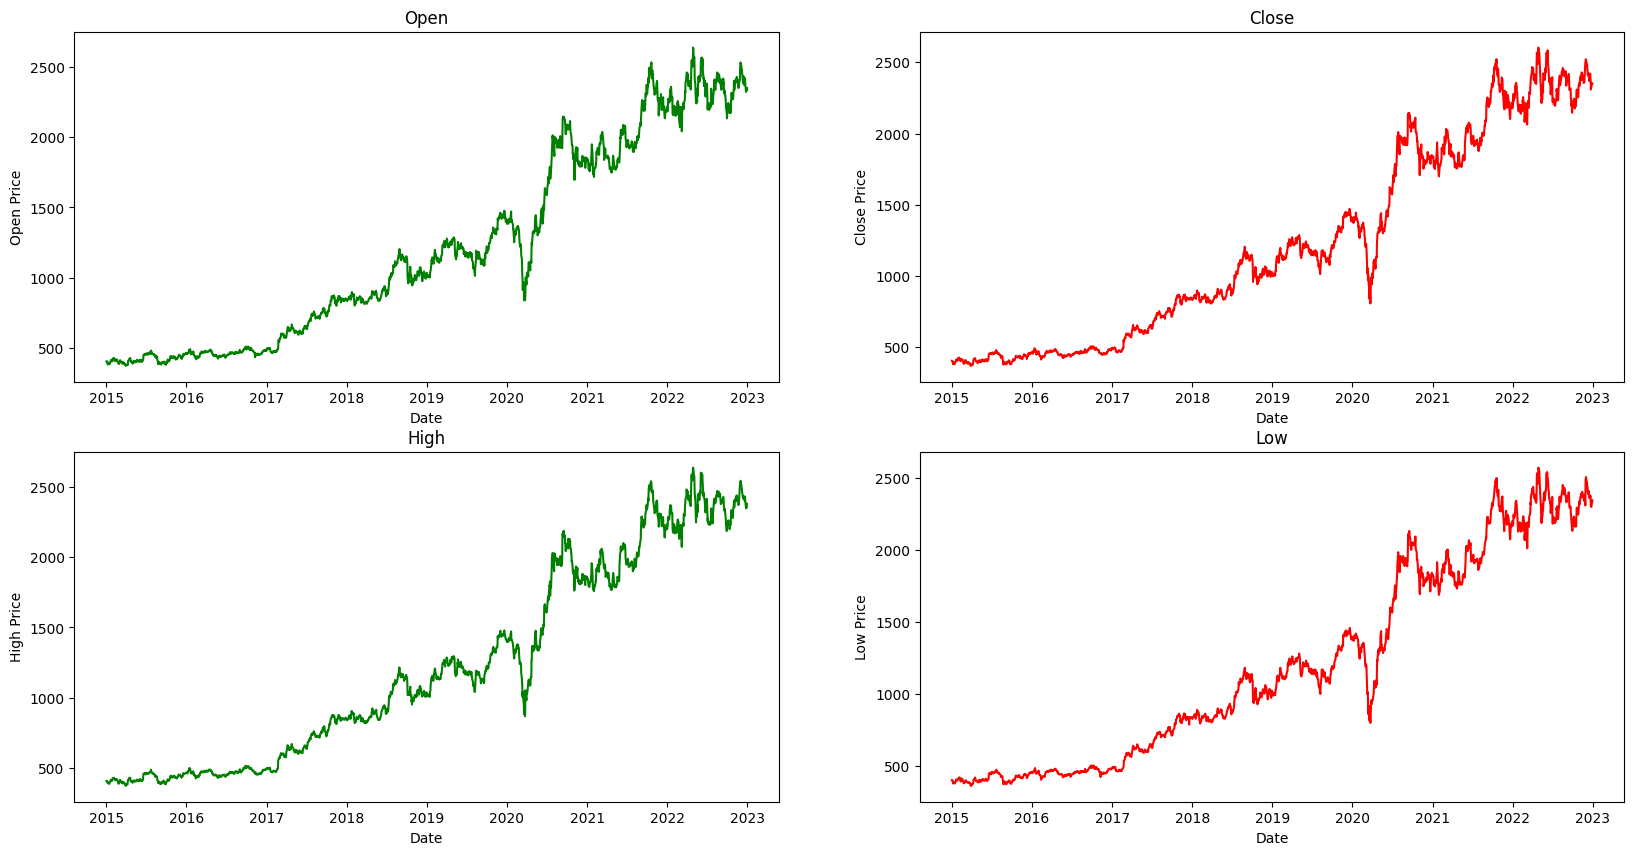

In [ ]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(df['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(df['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(df['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(df['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,WeekOfYear,RollingMean_5,RollingMean_10,RollingStd_5,Lag_1,Lag_2,Lag_3
Date,,,,,,,,,,,,,,,,,
2015-01-01,405.186554,407.792389,403.975037,405.917999,382.812164,1481821.0,1970,1,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,406.009430,409.643921,404.272217,404.843658,381.798981,3665683.0,1970,1,1,3,1,NaN,NaN,NaN,382.812164,NaN,NaN
2015-01-05,404.592224,407.289520,399.609100,400.409149,377.616882,5051970.0,1970,1,1,3,1,NaN,NaN,NaN,381.798981,382.812164,NaN
2015-01-06,397.734741,399.106232,380.362396,382.236786,360.478943,9313990.0,1970,1,1,3,1,NaN,NaN,NaN,377.616882,381.798981,382.812164
2015-01-07,382.693970,392.614471,382.648254,390.557220,368.325775,10360156.0,1970,1,1,3,1,374.206549,NaN,9.570301,360.478943,377.616882,381.798981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2321.113525,2346.265137,2300.484375,2329.697266,2321.496582,2995121.0,1970,1,1,3,1,2356.465674,2372.414160,44.463541,2301.400146,2370.933350,2377.095703
2022-12-27,2335.189209,2352.541504,2321.574951,2348.757324,2340.489746,2881635.0,1970,1,1,3,1,2342.283105,2365.028564,32.169339,2321.496582,2301.400146,2370.933350
2022-12-28,2342.573242,2353.464600,2327.343750,2348.526611,2340.259766,3729696.0,1970,1,1,3,1,2334.915918,2358.493750,25.788880,2340.489746,2321.496582,2301.400146


In [ ]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(df['Close'])
close_df

,Close
Date,
2015-01-01,405.917999
2015-01-02,404.843658
2015-01-05,400.409149
2015-01-06,382.236786
2015-01-07,390.557220
...,...
2022-12-26,2329.697266
2022-12-27,2348.757324
2022-12-28,2348.526611


In [ ]:
print(close_df.shape)

(1977, 1)


In [ ]:
close_df=close_df.reset_index()

In [ ]:
close_df['Date']

0      2015-01-01
1      2015-01-02
2      2015-01-05
3      2015-01-06
4      2015-01-07
          ...    
1972   2022-12-26
1973   2022-12-27
1974   2022-12-28
1975   2022-12-29
1976   2022-12-30
Name: Date, Length: 1977, dtype: datetime64[ns]

In [ ]:
# Selecting features and target variable
features = ['Adj Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear',
            'RollingMean_5', 'RollingMean_10', 'RollingStd_5', 'Lag_1', 'Lag_2', 'Lag_3']
target = 'Close'

In [ ]:
# Normalizing / scaling close value between 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(np.array(close_df['Close']).reshape(-1, 1))

In [ ]:
scaler

MinMaxScaler()

# ***Model Building***

In [ ]:
# Split data for training and testing
training_size = int(len(closedf) * 0.86)
test_size = len(closedf) - training_size
train_data, test_data = closedf[0:training_size, :], closedf[training_size:len(closedf), :1]

In [ ]:
# Create new dataset according to the requirement of time-series prediction
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1686, 13)
y_train:  (1686,)
X_test:  (263, 13)
y_test (263,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reshape the data to be compatible with the scikit-learn models
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Impute missing values in training and testing data
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = imputer.transform(y_test.reshape(-1, 1)).ravel()

In [ ]:
# Check for any remaining NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0


In [ ]:
# Ensure y_train and y_test are 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Dictionary to store predictions and model performance
predictions = {}
model_performance = {}

In [ ]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}


# Train and predict with each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_performance[name] = {
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    }

# Output model performance
model_performance

{'Linear Regression': {'MSE': 0.00033135195684275246,
  'MAE': 0.013879865300951618,
  'R2 Score': 0.871436873751075},
 'Decision Tree': {'MSE': 0.001415336060079617,
  'MAE': 0.03017399268032197,
  'R2 Score': 0.45085572962822895},
 'Random Forest': {'MSE': 0.0006741267306733588,
  'MAE': 0.02021283687327589,
  'R2 Score': 0.7384417439114039},
 'Support Vector Machine': {'MSE': 0.0027526557699142995,
  'MAE': 0.04192473296094907,
  'R2 Score': -0.06801853424776105}}

# *Model evaluation*

In [ ]:
# Evaluate model performance
for name, metrics in model_performance.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"R-squared (R2) Score: {metrics['R2 Score']}")
    print("\n")

Model: Linear Regression
Mean Squared Error (MSE): 0.00033135195684275246
Mean Absolute Error (MAE): 0.013879865300951618
R-squared (R2) Score: 0.871436873751075


Model: Decision Tree
Mean Squared Error (MSE): 0.001415336060079617
Mean Absolute Error (MAE): 0.03017399268032197
R-squared (R2) Score: 0.45085572962822895


Model: Random Forest
Mean Squared Error (MSE): 0.0006741267306733588
Mean Absolute Error (MAE): 0.02021283687327589
R-squared (R2) Score: 0.7384417439114039


Model: Support Vector Machine
Mean Squared Error (MSE): 0.0027526557699142995
Mean Absolute Error (MAE): 0.04192473296094907
R-squared (R2) Score: -0.06801853424776105




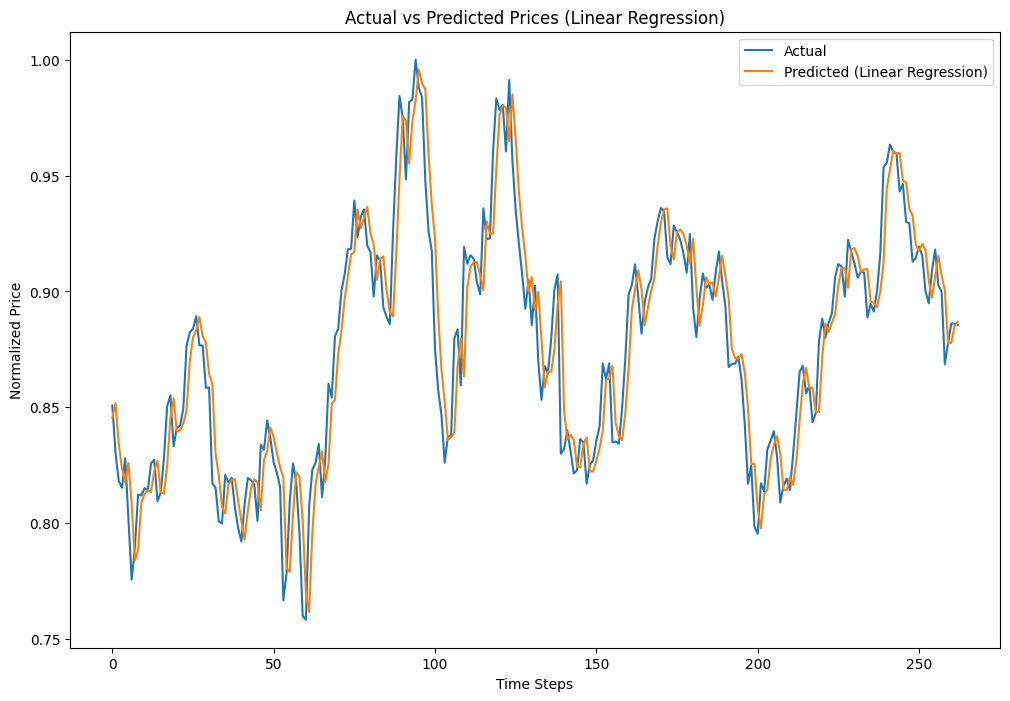

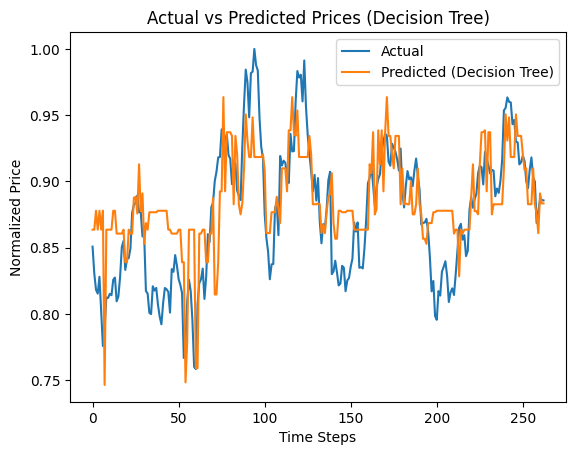

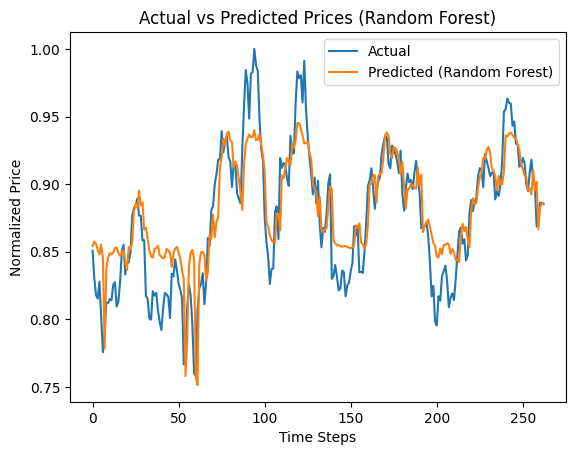

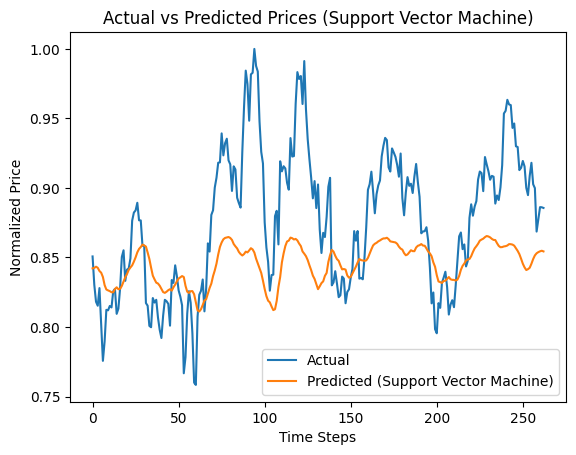

In [ ]:
# Plotting the predicted vs actual values
plt.figure(figsize=(12, 8))

for name, y_pred in predictions.items():
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label=f'Predicted ({name})')
    plt.title(f'Actual vs Predicted Prices ({name})')
    plt.xlabel('Time Steps')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.show()